In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import user, password, and database name
from config import user_password, db_name

In [2]:
# SQL alchemy
from sqlalchemy import create_engine

# Create engine and connection
engine = create_engine(f'postgresql://{user_password}@localhost:5432/{db_name}')
connection = engine.connect()

In [3]:
# Query all data from the salaries table in the database
salaries_df = pd.read_sql('select * from salaries', connection)
salaries_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [4]:
# Query all data from the titles table in the database
titles_df = pd.read_sql('select * from titles', connection)

# Display data frame
titles_df.head(10)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [5]:
# Query all data from the salaries table in the database
employees_df = pd.read_sql('select * from employees', connection)

# Display data frame
employees_df.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [6]:
# Query all data from the employees table in the database
employees_df = employees_df.rename(columns={'emp_title_id':'title_id'})

# Display data frame
employees_df.head(10)

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [7]:
# Merge employees data frame with titles data frame
employees_titles_merge_df = pd.merge(employees_df, titles_df, on='title_id')

# Display data frame
employees_titles_merge_df.head(10)

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff
5,476443,s0001,1952-08-27,Ziya,Asmuth,M,1995-08-24,Staff
6,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,Staff
7,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,Staff
8,280408,s0001,1964-09-19,Elliott,Perl,M,1987-10-29,Staff
9,229010,s0001,1961-11-12,Mark,Cappelli,M,1990-05-07,Staff


In [8]:
# Merge employees_titles_merge data frame with salaries data frame
salaries_titles_merge_df = pd.merge(employees_titles_merge_df, salaries_df, on='emp_no')

# Display data frame
salaries_titles_merge_df.head(10)

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016
5,476443,s0001,1952-08-27,Ziya,Asmuth,M,1995-08-24,Staff,63371
6,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,Staff,60678
7,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,Staff,63377
8,280408,s0001,1964-09-19,Elliott,Perl,M,1987-10-29,Staff,75963
9,229010,s0001,1961-11-12,Mark,Cappelli,M,1990-05-07,Staff,40000


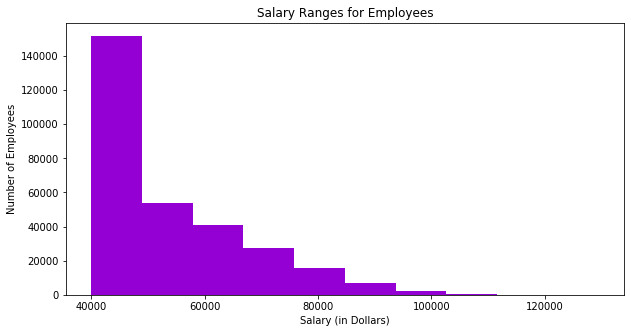

In [9]:
# Create a variable to hold the salaries
salaries = salaries_titles_merge_df['salary']

# Set figure size
plt.figure(figsize=(10,5))

# Create histogram
plt.hist(salaries, color='darkviolet')

# Label x-axis and y-axis
plt.xlabel('Salary (in Dollars)')
plt.ylabel('Number of Employees')

# Set title
plt.title('Salary Ranges for Employees')

# Display graph
plt.show()

In [10]:
# Create a data frame that groups average salary by title
avg_titles_salaries_df = salaries_titles_merge_df.groupby('title')\
                            .mean().drop(columns='emp_no').reset_index()

# Display data frame
avg_titles_salaries_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


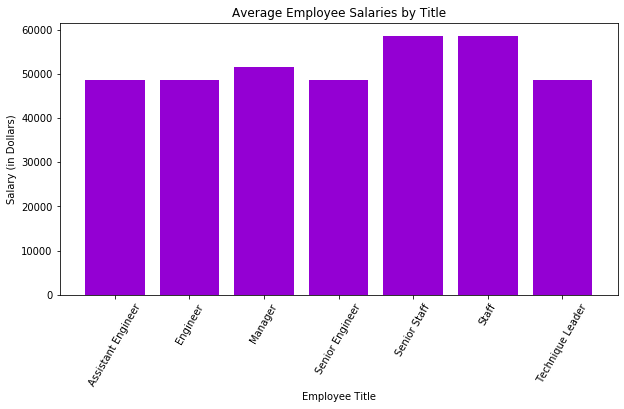

In [11]:
# Set x-axis, y-axis, and tick locations
x_axis = avg_titles_salaries_df['title']
tick_location = np.arange(len(x_axis))
y_axis = avg_titles_salaries_df['salary']

# Set figure size
plt.figure(figsize=(10,5))

# Create bar chart
plt.bar(x_axis, y_axis, color='darkviolet')

# Set x-axis tick names to employee title
plt.xticks(tick_location, x_axis, rotation=60)

# Label x-axis and y-axis
plt.xlabel('Employee Title')
plt.ylabel('Salary (in Dollars)')

# Set title
plt.title('Average Employee Salaries by Title')

# Show graph
plt.show()

In [12]:
salaries_titles_merge_df.loc[salaries_titles_merge_df['emp_no'] == 499942]

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Technique Leader,40000
